# NAIVE BAYES CLASSIFIERS

In [3]:
import numpy as np
import pandas as pd
import os
from collections import Counter
import math
from scipy.stats import norm

## step - 01 HANDLING DATA 

In [4]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## step - 02 SUMMARIZE THE DATA

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
target_category = iris['Species'].unique()
target_category = list(map(str, target_category))
print(target_category)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [7]:
# data visulisation 
import seaborn as sns

<AxesSubplot:xlabel='Species'>

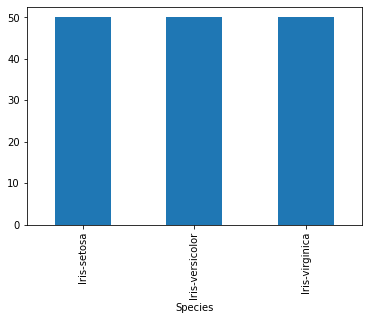

In [20]:
iris.groupby('Species').Species.count().plot.bar(ylim = 0)

In [18]:
target_category = iris['Species'].unique()
target_category = list(map(str,target_category))
print(target_category)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


# DATA VISULISATION

<AxesSubplot:xlabel='Species'>

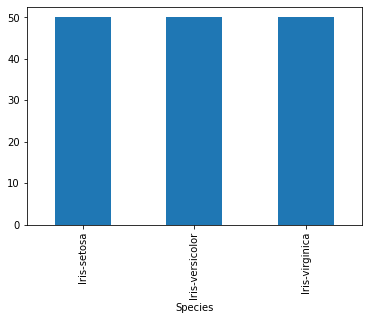

In [23]:
iris.groupby('Species').Species.count().plot.bar(ylim  = 0)

In [28]:
species = iris.Species
data = iris.drop(columns =['Species', 'Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
iris['Category'] = iris['Species'].factorize()[0]
category = iris['Category']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Category
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [41]:
#split dataset into test set(20%) and train set(80%) using stratify to split into equal size
from sklearn.model_selection import train_test_split

data_train,data_test,species_train,species_test = train_test_split(data,category, test_size = 0.2, stratify = category,random_state=1)
print(np.bincount(species_train))

[40 40 40]


In [43]:
newIris= pd.DataFrame(np.column_stack([data_train, species_train]))

In [50]:
species_train


21     0
47     0
141    2
90     1
64     1
      ..
41     0
93     1
26     0
3      0
42     0
Name: Category, Length: 120, dtype: int64

In [55]:
setosa= newIris[newIris[4] == 0]
versicolor = newIris[newIris[4] == 1]
virginiaca = newIris[newIris[4] == 2]

newIris = pd.concat([setosa, versicolor, virginiaca])

In [56]:
setosa_data=newIris[0:40] 
versicolor_data=newIris[40:80]
virginica_data=newIris[80:120]

In [73]:
setosa_mean = setosa_data.mean()
versicolor_mean = versicolor_data.mean()
virginica_mean= virginica_data.mean()

In [61]:
setosa_std = setosa_data.std()
versicolor_std = versicolor_data.std()
virginica_std = virginica_data.std()

In [64]:
x = []
likelihood = []

for j in range(len(newIris)):
    distribution = 1
    if(j< 40):
        mean = setosa_mean
        std = setosa_std
    if(j>=40 and j<80):
        mean=versicolor_mean
        std = versicolor_std
    if(j>=80 and j<120):
        mean=virginica_mean
        std = virginica_std 
        
    for i in range(4):
        x = newIris.iloc[j]
        a = ((x[i]- mean[i])**2)/(2*std[i]**2)
        b= math.sqrt(2*math.pi*(std[i]**2))
        y = math.exp(-a)/b
        distribution= distribution*y 
    likelihood.append(distribution)
    x = []
    
print(likelihood)

[1.4426580700892142, 4.859950538247494, 3.681311494548152, 0.5602613645293171, 11.096692414208938, 4.708645550519092, 0.9869177278847482, 5.027865366544021, 10.634222125259459, 0.3347440525802828, 2.5067408810201983, 5.523920120747676, 0.08046997818740641, 4.429608698883286, 9.194055698490734, 0.06525343204281543, 0.24506445794291157, 2.3282164040871396, 0.04070926293372312, 6.491269205996306, 0.3020811479117195, 4.4807889760388715, 4.103501562127629, 9.074380401691084, 5.040647664716327, 10.402481819111953, 4.846470606571818, 1.0944825796912079, 0.0502681254327594, 5.461187819110376, 4.913679372606572, 9.366533208389093, 8.510389058937557, 0.4502965389209152, 2.7530617779191386, 4.151748278169196, 0.021453261081038864, 1.6118835377478418, 4.074492875633123, 1.5853896384286335, 0.8403628783339735, 0.3959314997528379, 0.0948400685663931, 0.4082805469513769, 0.046744805289939496, 0.5249417793314618, 0.13294660495590657, 0.17103373105970487, 1.4176966480545758, 1.5221936082025496, 0.05579

In [65]:
setosa_priori = len(setosa_data)/len(newIris)
versicolor_priori = len(versicolor_data)/len(newIris)
virginica_priori = len(virginica_data)/len(newIris)

print(setosa_priori)
print(versicolor_priori)
print(virginica_priori)

0.3333333333333333
0.3333333333333333
0.3333333333333333


In [66]:
newTest = pd.DataFrame(np.column_stack([data_test,species_test]))

In [67]:
setosa = newTest[newTest[4] == 0]
versicolor = newTest[newTest[4]==1]       
virginica  = newTest[newTest[4]==2] 
newTest = pd.concat([setosa,versicolor,virginica])

In [74]:
testLikelihood =[]
x=[]
testPosterior=[]
posteriorSpecies =[]


for j in range(len(newTest)):
    for c in range(3): 
        if (c==0):
            mean = setosa_mean
            std = setosa_std
            priori = setosa_priori
        if (c == 1):
            mean= versicolor_mean
            std = versicolor_std
            priori = versicolor_priori
        if(c == 2):
            mean= virginica_mean
            std = virginica_std
            priori = virginica_priori
        distribution = 1       
        for i in range(4):
            x = newTest.iloc[j] 
            a= ((x[i]- mean[i])**2)/(2*std[i]**2)
            b= math.sqrt(2*math.pi*(std[i]**2))
            y = math.exp(-a)/b 
            distribution= distribution*y
        x=[]    
        testLikelihood.append(distribution)
        posterior = testLikelihood[c]* priori    #Calculate posterior values
        testPosterior.append(posterior)
        maxPosterior = testPosterior.index(max(testPosterior))   #Finds the maximum value
    posteriorSpecies.append(maxPosterior)
   

    testLikelihood =[]    
    testPosterior=[] 

In [79]:
species_test

107    2
9      0
98     1
11     0
43     0
0      0
148    2
111    2
121    2
76     1
16     0
53     1
112    2
62     1
113    2
15     0
102    2
71     1
57     1
127    2
74     1
66     1
37     0
8      0
147    2
106    2
5      0
12     0
56     1
54     1
Name: Category, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(species_test, posteriorSpecies)

0.36666666666666664